In [1]:
# Loading the required modules
import json
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(url):
    """
    Load data from a given URL using BeautifulSoup.

    Parameters:
    - url (str): The URL to fetch data from.

    Returns:
    - soup (BeautifulSoup): Parsed HTML content.
    """
    # Send a GET request to the URL
    response = requests.get(url)

    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    return soup

In [3]:
def extract_and_load_data(script_element, data_type):
    if script_element:
        # Extract the JSON data using a regular expression
        script_text = script_element.text
        match = re.search(f"var {data_type}\s+=\s+JSON\.parse\('(.+?)'\)", script_text)

        if match:
            json_data_encoded = match.group(1)

            try:
                # Decode the encoded JSON data
                json_data = json.loads(json_data_encoded.encode('utf').decode('unicode_escape'))

                # Create a DataFrame from the JSON data
                df_data = pd.DataFrame(json_data)

                print(f"Successfully loaded {data_type} data into DataFrame.")
                return df_data
            except Exception as e:
                print(f"Error decoding JSON data: {str(e)}")
                return None
        else:
            print(f"JSON data not found in the {data_type} script.")
            return None
    else:
        print(f"{data_type} script element not found on the page.")
        return None

In [4]:
# URLs for the two years
url_2022 = "https://understat.com/team/Barcelona/2022"
url_2023 = "https://understat.com/team/Barcelona/2023"
url_2024 = "https://understat.com/team/Barcelona/2024"

In [5]:
# Load the data for 2022 into the dataframes
soup_2022 = load_data(url_2022)
df_games_data_2022 = extract_and_load_data(soup_2022.find("script", string=re.compile(r"var datesData\s+=\s+JSON\.parse\(")), "datesData")
df_statistics_data_2022 = extract_and_load_data(soup_2022.find("script", string=re.compile(r"var statisticsData\s+=\s+JSON\.parse\(")), "statisticsData")
df_players_data_2022 = extract_and_load_data(soup_2022.find("script", string=re.compile(r"var playersData\s+=\s+JSON\.parse\(")), "playersData")

# Load the data for 2023 into the dataframes
soup_2023 = load_data(url_2023)
df_games_data_2023 = extract_and_load_data(soup_2023.find("script", string=re.compile(r"var datesData\s+=\s+JSON\.parse\(")), "datesData")
df_statistics_data_2023 = extract_and_load_data(soup_2023.find("script", string=re.compile(r"var statisticsData\s+=\s+JSON\.parse\(")), "statisticsData")
df_players_data_2023 = extract_and_load_data(soup_2023.find("script", string=re.compile(r"var playersData\s+=\s+JSON\.parse\(")), "playersData")


# Load the data for 2023 into the dataframes
soup_2024 = load_data(url_2024)
df_games_data_2024 = extract_and_load_data(soup_2024.find("script", string=re.compile(r"var datesData\s+=\s+JSON\.parse\(")), "datesData")
df_statistics_data_2024 = extract_and_load_data(soup_2024.find("script", string=re.compile(r"var statisticsData\s+=\s+JSON\.parse\(")), "statisticsData")
df_players_data_2024 = extract_and_load_data(soup_2024.find("script", string=re.compile(r"var playersData\s+=\s+JSON\.parse\(")), "playersData")

Successfully loaded datesData data into DataFrame.
Successfully loaded statisticsData data into DataFrame.
Successfully loaded playersData data into DataFrame.
Successfully loaded datesData data into DataFrame.
Successfully loaded statisticsData data into DataFrame.
Successfully loaded playersData data into DataFrame.
Successfully loaded datesData data into DataFrame.
Successfully loaded statisticsData data into DataFrame.
Successfully loaded playersData data into DataFrame.


In [14]:
# Convert 'goals' and 'xG' columns to separate columns
df_games_data_2024['goals_h'] = df_games_data_2024['goals'].apply(lambda x: int(x['h']) if x['h'] is not None else 0)
df_games_data_2024['goals_a'] = df_games_data_2024['goals'].apply(lambda x: int(x['a']) if x['a'] is not None else 0)

df_games_data_2024['xG_h'] = df_games_data_2024['xG'].apply(lambda x: float(x['h']) if x['h'] is not None else 0.0)
df_games_data_2024['xG_a'] = df_games_data_2024['xG'].apply(lambda x: float(x['a']) if x['a'] is not None else 0.0)

# Extract 'title' from 'h' and 'a' columns
df_games_data_2024['team_h'] = df_games_data_2024['h'].apply(lambda x: x['title'] if x is not None else '')
df_games_data_2024['team_a'] = df_games_data_2024['a'].apply(lambda x: x['title'] if x is not None else '')

# Convert type of datetime
df_games_data_2024['datetime'] = pd.to_datetime(df_games_data_2024['datetime'])

# Drop the original 'goals' and 'xG' columns if needed
df_games_data_2024.drop(['goals', 'xG', 'h', 'a', 'forecast', 'isResult', 'id'], axis=1, inplace=True)

df_games_data_2024

,side,datetime,result,goals_h,goals_a,xG_h,xG_a,team_h,team_a
0,a,2024-08-17 19:30:00,w,1,2,1.552060,3.488240,Valencia,Barcelona
1,h,2024-08-24 17:00:00,w,2,1,2.415770,1.099850,Barcelona,Athletic Club
2,a,2024-08-27 19:30:00,w,1,2,0.392473,1.518720,Rayo Vallecano,Barcelona
3,h,2024-08-31 15:00:00,w,7,0,4.940220,0.422493,Barcelona,Real Valladolid
4,a,2024-09-15 14:15:00,w,1,4,1.095680,2.593600,Girona,Barcelona
5,a,2024-09-22 16:30:00,w,1,5,2.396050,4.193700,Villarreal,Barcelona
6,h,2024-09-25 19:00:00,w,1,0,2.207990,0.929851,Barcelona,Getafe
7,a,2024-09-28 19:00:00,NaN,0,0,0.000000,0.000000,Osasuna,Barcelona
8,a,2024-10-06 15:00:00,NaN,0,0,0.000000,0.000000,Alaves,Barcelona
9,h,2024-10-20 15:00:00,NaN,0,0,0.000000,0.000000,Barcelona,Sevilla


In [18]:
# Convert 'goals' and 'xG' columns to separate columns
df_games_data_2023['goals_h'] = df_games_data_2023['goals'].apply(lambda x: int(x['h']) if x['h'] is not None else 0)
df_games_data_2023['goals_a'] = df_games_data_2023['goals'].apply(lambda x: int(x['a']) if x['a'] is not None else 0)

df_games_data_2023['xG_h'] = df_games_data_2023['xG'].apply(lambda x: float(x['h']) if x['h'] is not None else 0.0)
df_games_data_2023['xG_a'] = df_games_data_2023['xG'].apply(lambda x: float(x['a']) if x['a'] is not None else 0.0)

# Extract 'title' from 'h' and 'a' columns
df_games_data_2023['team_h'] = df_games_data_2023['h'].apply(lambda x: x['title'] if x is not None else '')
df_games_data_2023['team_a'] = df_games_data_2023['a'].apply(lambda x: x['title'] if x is not None else '')

# Convert type of datetime
df_games_data_2023['datetime'] = pd.to_datetime(df_games_data_2023['datetime'])

# Drop the original 'goals' and 'xG' columns if needed
df_games_data_2023.drop(['goals', 'xG', 'h', 'a', 'forecast', 'isResult', 'id'], axis=1, inplace=True)

df_games_data_2023

,side,datetime,result,goals_h,goals_a,xG_h,xG_a,team_h,team_a
0,a,2023-08-13 19:30:00,d,0,0,0.804505,1.678170,Getafe,Barcelona
1,h,2023-08-20 17:30:00,w,2,0,3.425240,1.111320,Barcelona,Cadiz
2,a,2023-08-27 15:30:00,w,3,4,1.871950,2.958070,Villarreal,Barcelona
3,a,2023-09-03 19:00:00,w,1,2,0.801843,1.772550,Osasuna,Barcelona
4,h,2023-09-16 19:00:00,w,5,0,2.546280,0.852869,Barcelona,Real Betis
5,h,2023-09-23 16:30:00,w,3,2,1.822460,1.679380,Barcelona,Celta Vigo
6,a,2023-09-26 19:30:00,d,2,2,1.213660,1.628150,Mallorca,Barcelona
7,h,2023-09-29 19:00:00,w,1,0,2.559800,1.075570,Barcelona,Sevilla
8,a,2023-10-08 19:00:00,d,2,2,0.611577,2.995520,Granada,Barcelona
9,h,2023-10-22 19:00:00,w,1,0,1.702660,0.453295,Barcelona,Athletic Club


C:\Users\Abdo\AppData\Local\Temp\ipykernel_2848\2804772028.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_data_2024_home['result_value'] = df_games_data_2024_home['result'].map(result_mapping)


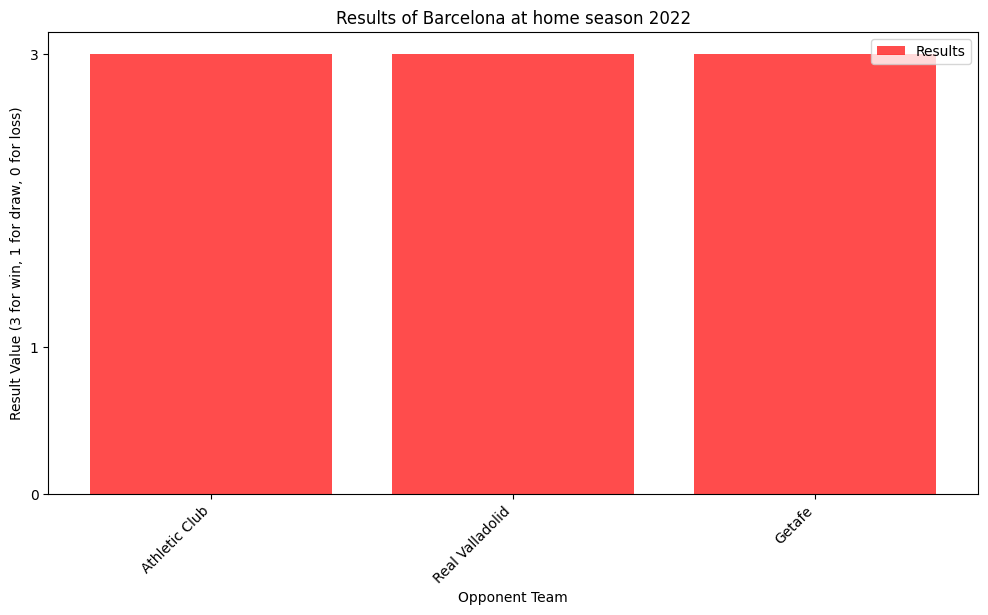

In [17]:
# the games of Barcelona at home
df_games_data_2024.head()
df_games_data_2024_home = df_games_data_2024[df_games_data_2024['team_h'] == 'Barcelona']
df_games_data_2024_home.head()

# Map results to corresponding values (3 for win, 1 for draw, 0 for loss)
result_mapping = {'w': 3, 'd': 1, 'l': 0}
df_games_data_2024_home['result_value'] = df_games_data_2024_home['result'].map(result_mapping)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_games_data_2024_home['team_a'], df_games_data_2024_home['result_value'], alpha=0.7, label='Results', color='red')

# Set the y-axis ticks
plt.yticks([0, 1, 3]) 

plt.xticks(rotation=45, ha='right')
plt.title('Results of Barcelona at home season 2022')
plt.xlabel('Opponent Team')
plt.ylabel('Result Value (3 for win, 1 for draw, 0 for loss)')
plt.legend()

plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_2848\1020221106.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_data_2024_home['result_value'] = df_games_data_2024_home['result'].map(result_mapping)
C:\Users\Abdo\AppData\Local\Temp\ipykernel_2848\1020221106.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_data_2023_home['result_value'] = df_games_data_2023_home['result'].map(result_mapping)


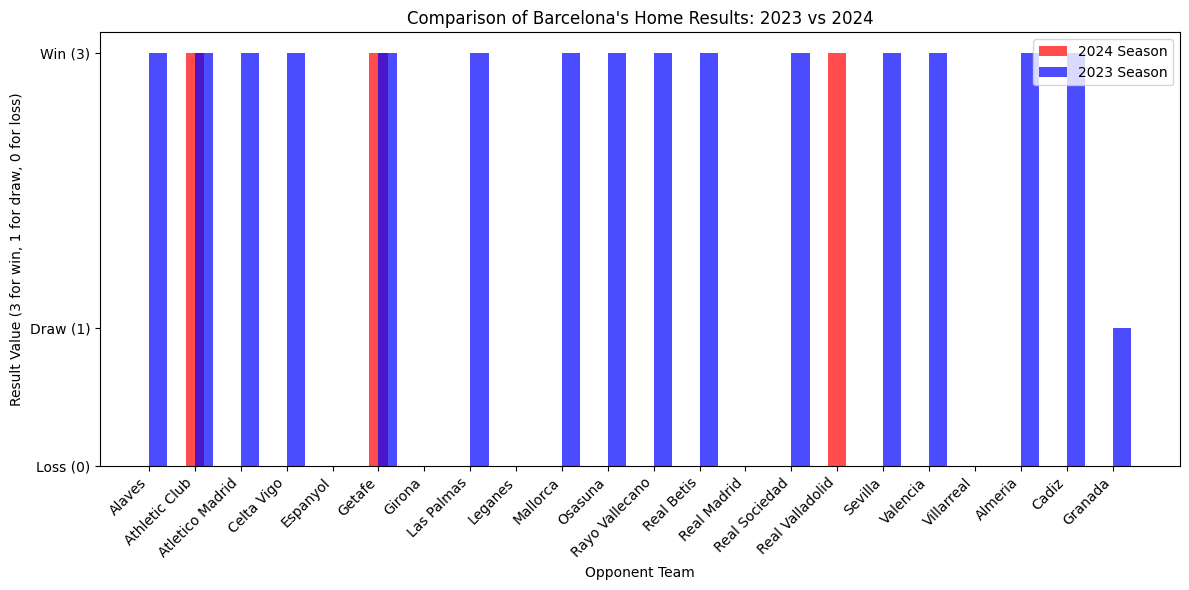

In [19]:
# Filter Barcelona's home games for 2024 and 2023
df_games_data_2024_home = df_games_data_2024[df_games_data_2024['team_h'] == 'Barcelona']
df_games_data_2023_home = df_games_data_2023[df_games_data_2023['team_h'] == 'Barcelona']

# Map results to corresponding values (3 for win, 1 for draw, 0 for loss)
result_mapping = {'w': 3, 'd': 1, 'l': 0}
df_games_data_2024_home['result_value'] = df_games_data_2024_home['result'].map(result_mapping)
df_games_data_2023_home['result_value'] = df_games_data_2023_home['result'].map(result_mapping)

# Ensure the opponent teams are ordered for consistent comparison
df_games_data_2024_home = df_games_data_2024_home.sort_values('team_a')
df_games_data_2023_home = df_games_data_2023_home.sort_values('team_a')

# Plotting the bar chart for comparison
plt.figure(figsize=(12, 6))

# Bar chart for 2024 results
plt.bar(df_games_data_2024_home['team_a'], df_games_data_2024_home['result_value'], alpha=0.7, label='2024 Season', color='red', width=0.4, align='center')

# Bar chart for 2023 results (shifted slightly to avoid overlap)
plt.bar(df_games_data_2023_home['team_a'], df_games_data_2023_home['result_value'], alpha=0.7, label='2023 Season', color='blue', width=0.4, align='edge')

# Set the y-axis ticks
plt.yticks([0, 1, 3], labels=['Loss (0)', 'Draw (1)', 'Win (3)'])

# Set x-ticks and rotation for clarity
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('Comparison of Barcelona\'s Home Results: 2023 vs 2024')
plt.xlabel('Opponent Team')
plt.ylabel('Result Value (3 for win, 1 for draw, 0 for loss)')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_2848\2732951652.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_data_2024_away['result_value'] = df_games_data_2024_away['result'].map(result_mapping)
C:\Users\Abdo\AppData\Local\Temp\ipykernel_2848\2732951652.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_data_2023_away['result_value'] = df_games_data_2023_away['result'].map(result_mapping)


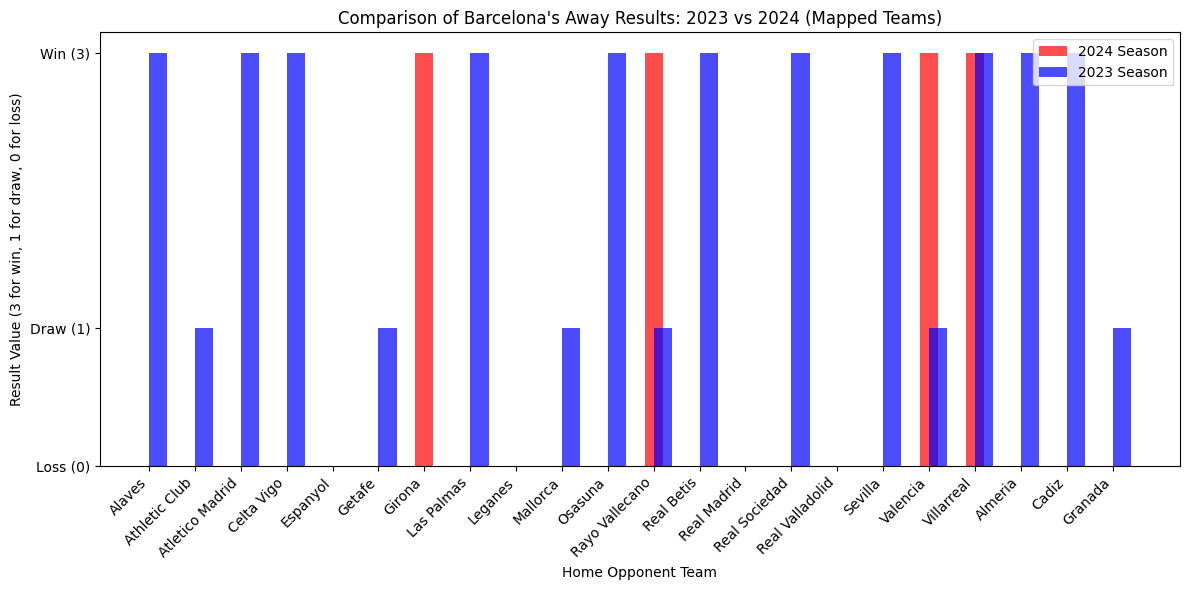

In [22]:
# Filter Barcelona's away games for 2024 and 2023
df_games_data_2024_away = df_games_data_2024[df_games_data_2024['team_a'] == 'Barcelona']
df_games_data_2023_away = df_games_data_2023[df_games_data_2023['team_a'] == 'Barcelona']

# Map results to corresponding values (3 for win, 1 for draw, 0 for loss)
result_mapping = {'w': 3, 'd': 1, 'l': 0}
df_games_data_2024_away['result_value'] = df_games_data_2024_away['result'].map(result_mapping)
df_games_data_2023_away['result_value'] = df_games_data_2023_away['result'].map(result_mapping)

# Ensure the opponent teams are ordered for consistent comparison
df_games_data_2024_away = df_games_data_2024_away.sort_values('team_h')
df_games_data_2023_away = df_games_data_2023_away.sort_values('team_h')


# Plotting the bar chart for comparison
plt.figure(figsize=(12, 6))

# Bar chart for 2024 results
plt.bar(df_games_data_2024_away['team_h'], df_games_data_2024_away['result_value'], alpha=0.7, label='2024 Season', color='red', width=0.4, align='center')

# Bar chart for 2023 results (shifted slightly to avoid overlap)
plt.bar(df_games_data_2023_away['team_h'], df_games_data_2023_away['result_value'], alpha=0.7, label='2023 Season', color='blue', width=0.4, align='edge')

# Set the y-axis ticks
plt.yticks([0, 1, 3], labels=['Loss (0)', 'Draw (1)', 'Win (3)'])

# Set x-ticks and rotation for clarity
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('Comparison of Barcelona\'s Away Results: 2023 vs 2024 (Mapped Teams)')
plt.xlabel('Home Opponent Team')
plt.ylabel('Result Value (3 for win, 1 for draw, 0 for loss)')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\Abdo\AppData\Local\Temp\ipykernel_2848\952949449.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_data_2024_away['result_value'] = df_games_data_2024_away['result'].map(result_mapping)
C:\Users\Abdo\AppData\Local\Temp\ipykernel_2848\952949449.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_data_2023_away['result_value'] = df_games_data_2023_away['result'].map(result_mapping)


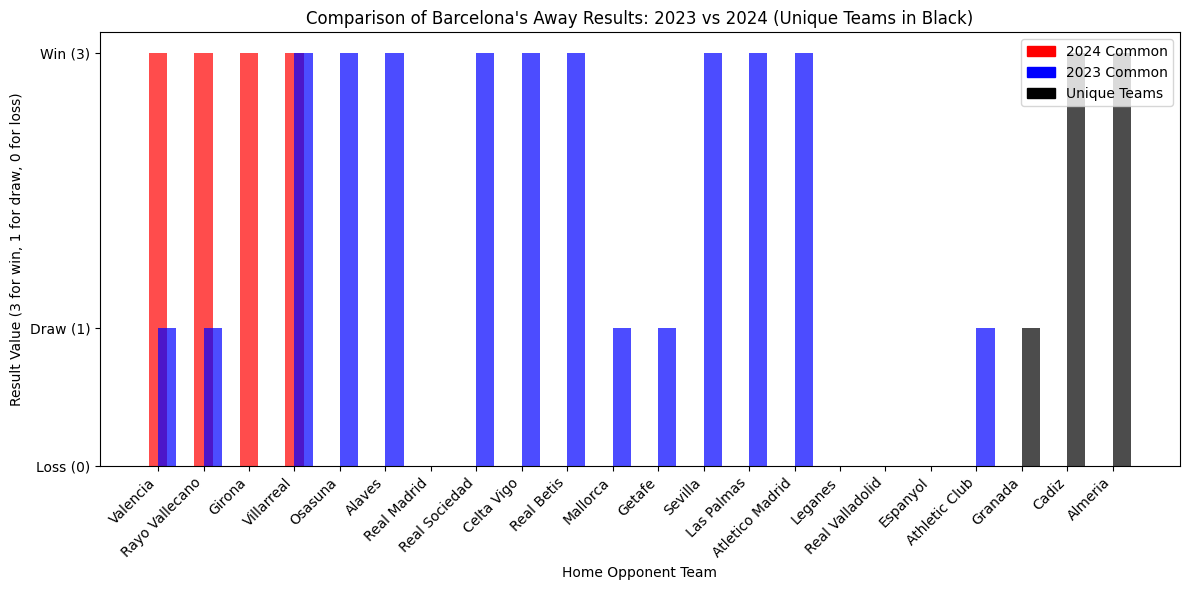

In [23]:
# Filter Barcelona's away games for 2024 and 2023
df_games_data_2024_away = df_games_data_2024[df_games_data_2024['team_a'] == 'Barcelona']
df_games_data_2023_away = df_games_data_2023[df_games_data_2023['team_a'] == 'Barcelona']

# Map results to corresponding values (3 for win, 1 for draw, 0 for loss)
result_mapping = {'w': 3, 'd': 1, 'l': 0}
df_games_data_2024_away['result_value'] = df_games_data_2024_away['result'].map(result_mapping)
df_games_data_2023_away['result_value'] = df_games_data_2023_away['result'].map(result_mapping)

# Find common teams and unique teams for each year
common_teams = set(df_games_data_2024_away['team_h']).intersection(set(df_games_data_2023_away['team_h']))
teams_only_2024 = set(df_games_data_2024_away['team_h']).difference(df_games_data_2023_away['team_h'])
teams_only_2023 = set(df_games_data_2023_away['team_h']).difference(df_games_data_2024_away['team_h'])

# Plotting the bar chart for comparison
plt.figure(figsize=(12, 6))

# Plot 2024 results: common teams in red, unique teams in black
for idx, row in df_games_data_2024_away.iterrows():
    color = 'black' if row['team_h'] in teams_only_2024 else 'red'
    plt.bar(row['team_h'], row['result_value'], alpha=0.7, color=color, width=0.4, align='center', label='2024 Season' if color == 'red' else '2024 Unique')

# Plot 2023 results: common teams in blue, unique teams in black
for idx, row in df_games_data_2023_away.iterrows():
    color = 'black' if row['team_h'] in teams_only_2023 else 'blue'
    plt.bar(row['team_h'], row['result_value'], alpha=0.7, color=color, width=0.4, align='edge', label='2023 Season' if color == 'blue' else '2023 Unique')

# Set the y-axis ticks
plt.yticks([0, 1, 3], labels=['Loss (0)', 'Draw (1)', 'Win (3)'])

# Set x-ticks and rotation for clarity
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('Comparison of Barcelona\'s Away Results: 2023 vs 2024 (Unique Teams in Black)')
plt.xlabel('Home Opponent Team')
plt.ylabel('Result Value (3 for win, 1 for draw, 0 for loss)')

# Add legend
handles = [plt.Rectangle((0, 0), 1, 1, color=c) for c in ['red', 'blue', 'black']]
labels = ['2024 Common', '2023 Common', 'Unique Teams']
plt.legend(handles, labels)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\Abdo\AppData\Local\Temp\ipykernel_2848\3245843848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_data_2024_home['result_value'] = df_games_data_2024_home['result'].map(result_mapping)
C:\Users\Abdo\AppData\Local\Temp\ipykernel_2848\3245843848.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_data_2023_home['result_value'] = df_games_data_2023_home['result'].map(result_mapping)


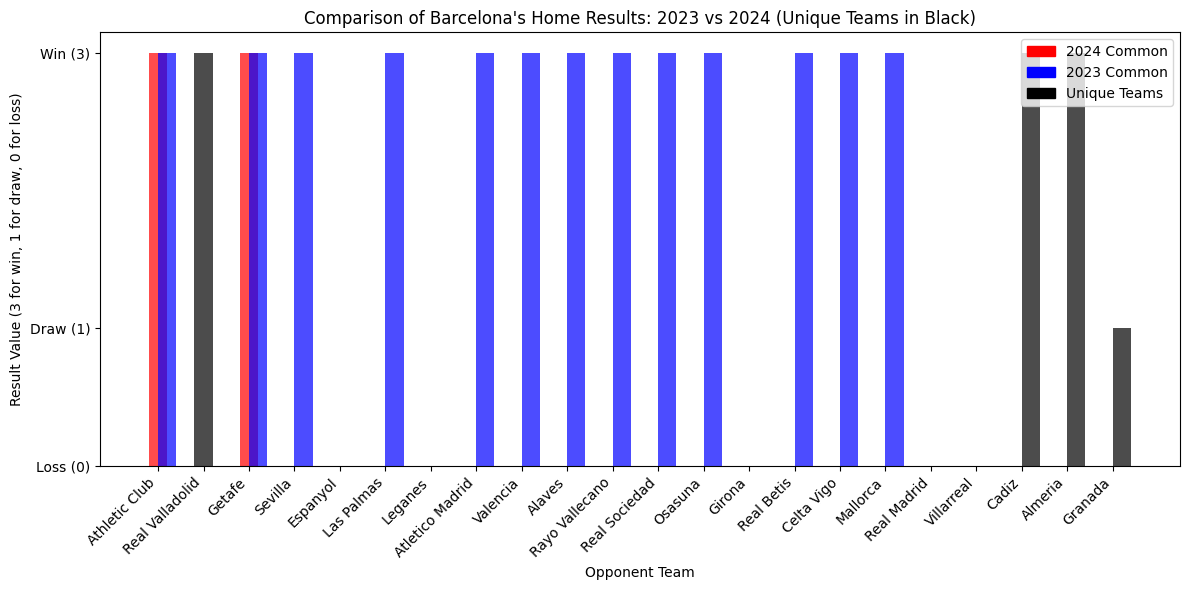

In [24]:
# Filter Barcelona's home games for 2024 and 2023
df_games_data_2024_home = df_games_data_2024[df_games_data_2024['team_h'] == 'Barcelona']
df_games_data_2023_home = df_games_data_2023[df_games_data_2023['team_h'] == 'Barcelona']

# Map results to corresponding values (3 for win, 1 for draw, 0 for loss)
result_mapping = {'w': 3, 'd': 1, 'l': 0}
df_games_data_2024_home['result_value'] = df_games_data_2024_home['result'].map(result_mapping)
df_games_data_2023_home['result_value'] = df_games_data_2023_home['result'].map(result_mapping)

# Find common teams and unique teams for each year
common_teams = set(df_games_data_2024_home['team_a']).intersection(set(df_games_data_2023_home['team_a']))
teams_only_2024 = set(df_games_data_2024_home['team_a']).difference(df_games_data_2023_home['team_a'])
teams_only_2023 = set(df_games_data_2023_home['team_a']).difference(df_games_data_2024_home['team_a'])

# Plotting the bar chart for comparison
plt.figure(figsize=(12, 6))

# Plot 2024 results: common teams in red, unique teams in black
for idx, row in df_games_data_2024_home.iterrows():
    color = 'black' if row['team_a'] in teams_only_2024 else 'red'
    plt.bar(row['team_a'], row['result_value'], alpha=0.7, color=color, width=0.4, align='center', label='2024 Season' if color == 'red' else '2024 Unique')

# Plot 2023 results: common teams in blue, unique teams in black
for idx, row in df_games_data_2023_home.iterrows():
    color = 'black' if row['team_a'] in teams_only_2023 else 'blue'
    plt.bar(row['team_a'], row['result_value'], alpha=0.7, color=color, width=0.4, align='edge', label='2023 Season' if color == 'blue' else '2023 Unique')

# Set the y-axis ticks
plt.yticks([0, 1, 3], labels=['Loss (0)', 'Draw (1)', 'Win (3)'])

# Set x-ticks and rotation for clarity
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('Comparison of Barcelona\'s Home Results: 2023 vs 2024 (Unique Teams in Black)')
plt.xlabel('Opponent Team')
plt.ylabel('Result Value (3 for win, 1 for draw, 0 for loss)')

# Add legend
handles = [plt.Rectangle((0, 0), 1, 1, color=c) for c in ['red', 'blue', 'black']]
labels = ['2024 Common', '2023 Common', 'Unique Teams']
plt.legend(handles, labels)

# Show the plot
plt.tight_layout()
plt.show()
